Goal - Implement standard QPE with simple controlled-phase unitary, known eigenstate
    Verify that phase estimate improves with more ancilla qubits

/var/folders/p2/r0zl4pzj01z9f25h559679jw0000gn/T/ipykernel_30401/3027258551.py:26: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  QFT(4, inverse=True, do_swaps=True),


     ┌───┐                                      ┌───────┐┌─┐         
  0: ┤ H ├─■────────────────────────────────────┤0      ├┤M├─────────
     ├───┤ │                                    │       │└╥┘┌─┐      
  1: ┤ H ├─┼─────────■──────────────────────────┤1      ├─╫─┤M├──────
     ├───┤ │         │                          │  IQFT │ ║ └╥┘┌─┐   
  2: ┤ H ├─┼─────────┼─────────■────────────────┤2      ├─╫──╫─┤M├───
     ├───┤ │         │         │                │       │ ║  ║ └╥┘┌─┐
  3: ┤ H ├─┼─────────┼─────────┼─────────■──────┤3      ├─╫──╫──╫─┤M├
     ├───┤ │P(3π/8)  │P(3π/4)  │P(3π/2)  │P(3π) └───────┘ ║  ║  ║ └╥┘
psi: ┤ X ├─■─────────■─────────■─────────■────────────────╫──╫──╫──╫─
     └───┘                                                ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════════════╩══╩══╩══╩═
                                                          0  1  2  3 


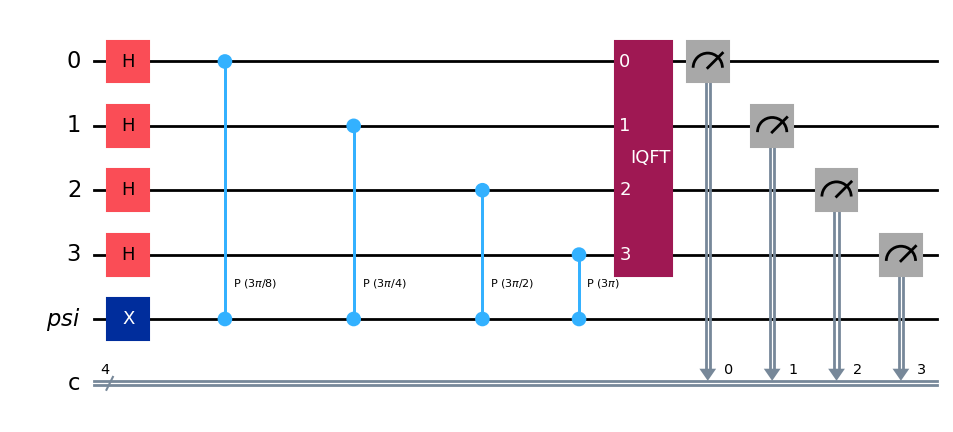

In [ ]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.circuit.library import QFT
import numpy as np
#n = 4 , ancilla has 4 bits
zero = QuantumRegister(1, "0") 
one = QuantumRegister(1, "1")
two = QuantumRegister(1, "2")
three = QuantumRegister(1, "3")
psi = QuantumRegister(1, "psi") #system qubit, where the U operator acts on and enables phase kickback
qc = QuantumCircuit(zero, one, two, three, psi, ClassicalRegister(4, "c"))
#already init to 0 state to prepare for superposition
qc.h(zero[0])
qc.h(one[0])
qc.h(two[0])
qc.h(three[0])
#all ancilla qubits are now in superposition via hadamard gates
#connected the ancilla qubits to the system qubit via controlled U operations, for qubit 0 it will be U^2^0
qc.x(psi) #preparing |1> state for phase kickback, making it an eigenstate of U.       @##########why
theta = 3 * np.pi / 8   # corresponds to φ = 3/16, phase will be kicked back to ancilla qubits
qc.cp(theta, zero[0], psi[0]) #cp is controlled phase gate = controlled U, 0 is control qubit and psi is target
qc.cp(2 * theta, one[0], psi[0]) #for qubit 1 it will be U^2^1 etc
qc.cp(4 * theta, two[0], psi[0])    
qc.cp(8 * theta, three[0], psi[0])
#inverse QFT on ancilla qubits
qc.append(
    QFT(4, inverse=True, do_swaps=True),
    [zero[0], one[0], two[0], three[0]]
)

qc.measure(zero, 0)
qc.measure(one, 1)
qc.measure(two, 2)
qc.measure(three, 3)
qc.draw('mpl')
